# Analyzing
To get a better idea of the structure of the csv files, some methods for analyzing and visualizing can be found here.

In [11]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import os
import warnings
# Root CSV files directory
dirname = "./data/"

### Load

In [2]:
listfile = os.listdir(dirname)
data = []
for wordname in listfile:
    if wordname == ".DS_Store":
        continue
    for csv in os.listdir(dirname + wordname):
        filepath = os.path.join(dirname, wordname, csv)
        content = pd.read_csv(filepath, sep=';')
        data.append((wordname, content))

## Frame count distribution per word

In [8]:
row_lengths = {}
for (word, content) in data:
    row_lengths[word] = []
for (word, content) in data:
    row_lengths[word].append(content.shape[0])
print(row_lengths)

{'unser': [90, 61, 92, 80, 63, 94, 65, 101, 88, 68, 59, 76, 47, 115, 52, 69, 73, 51, 65, 61, 50, 93, 69, 94, 75, 81, 44, 45, 95, 76, 59, 77, 84, 59, 84, 74, 83, 75, 89, 78, 71, 92, 86, 77, 85, 79, 97, 89, 90, 73, 61, 91, 91, 70, 77, 79, 60, 89, 66, 89, 75, 65, 89, 64], 'du': [82, 74, 66, 91, 50, 85, 70, 67, 65, 72, 55, 57, 53, 72, 89, 71, 84, 79, 44, 44, 49, 63, 67, 50, 76, 70, 44, 66, 49, 68, 75, 63, 60, 76, 94, 72, 76, 41, 69, 90, 61, 73, 64, 84, 41, 64, 47, 42, 48, 56, 60, 64, 61, 62, 68, 85, 44, 79, 69, 64, 79, 41, 52, 70, 45, 74], 'zeigen': [83, 75, 45, 87, 49, 56, 79, 68, 74, 99, 92, 59, 74, 42, 89, 85, 76, 77, 45, 81, 76, 69, 77, 77, 74, 74, 79, 74, 70, 51, 57, 50, 73, 78, 65, 69, 46, 87, 93, 91, 72, 85, 50, 85, 73, 91, 67, 70, 86, 72, 78, 90, 71, 79, 85, 87, 66, 44, 85, 78, 65, 87, 88, 70, 65, 77, 81, 80, 74], 'Software': [49, 85, 73, 78, 73, 77, 81, 90, 84, 73, 63, 66, 58, 63, 85, 96, 77, 45, 88, 106, 91, 64, 63, 91, 77, 59, 72, 67, 83, 52, 83, 59, 96, 77, 78, 91, 91, 54, 68, 

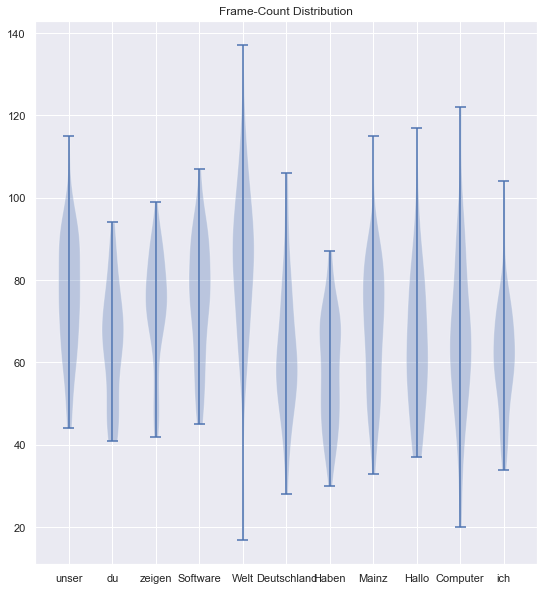

In [10]:
all_data = row_lengths.values()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9,10))

# plot violin plot
axs.violinplot(all_data)
axs.set_title('Frame-Count Distribution')
plt.setp(axs, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=row_lengths.keys())
plt.show()

In [45]:
sign = np.array(data[20][1])
np.nan_to_num(sign, copy=False)
rows = []
for row in sign:
    x, y = row[::2], row[1::2]
    rows.append((x,y))


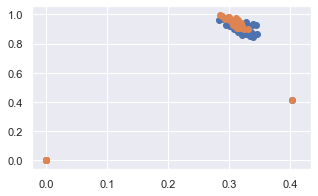

In [53]:
fig, ax = plt.subplots(figsize=(5, 3))
scat = ax.scatter(rows[1][0], rows[1][1])
def animate(i):
    ax.scatter(rows[i][0], rows[i][1])
anim = FuncAnimation(
fig, animate, interval=12, frames=len(rows)-1)